In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
X_train = pd.read_csv('train_auto.csv')
X_train.head(5)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [3]:
import gc
y_train = X_train['TARGET_FLAG']
del X_train['TARGET_FLAG']
gc.collect()

217

In [4]:
X_test = pd.read_csv('test_auto.csv ')
X_test.head(5)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [5]:
# shape of trainning set and test set
print(X_train.shape)
print(X_test.shape)

(8161, 25)
(2141, 26)


# Data Overview

In [6]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [7]:
des_train = description(X_train)
des_train

,Name,dtypes,Missing,Uniques
0,INDEX,int64,0,8161
1,TARGET_AMT,float64,0,1949
2,KIDSDRIV,int64,0,5
3,AGE,float64,6,60
4,HOMEKIDS,int64,0,6
5,YOJ,float64,454,21
6,INCOME,object,445,6612
7,PARENT1,object,0,2
8,HOME_VAL,object,464,5106
9,MSTATUS,object,0,2


In [8]:
des_test = description(X_test)
des_test

,Name,dtypes,Missing,Uniques
0,INDEX,int64,0,2141
1,TARGET_FLAG,float64,2141,0
2,TARGET_AMT,float64,2141,0
3,KIDSDRIV,int64,0,4
4,AGE,float64,1,54
5,HOMEKIDS,int64,0,6
6,YOJ,float64,94,20
7,INCOME,object,125,1803
8,PARENT1,object,0,2
9,HOME_VAL,object,111,1397


In [9]:
X_train['INCOME'] = X_train['INCOME'].str.replace(r'\D', '')
X_train['INCOME']
X_train['HOME_VAL'] = X_train['HOME_VAL'].str.replace(r'\D', '')
X_train['HOME_VAL']
X_train['INCOME'] = X_train['INCOME'].astype(float)
X_train['HOME_VAL'] = X_train['HOME_VAL'].astype(float)
X_train['BLUEBOOK'] = X_train['BLUEBOOK'].str.replace(r'\D', '')
X_train['BLUEBOOK']
X_train['BLUEBOOK'] = X_train['BLUEBOOK'].astype(float)
X_train['OLDCLAIM'] = X_train['OLDCLAIM'].str.replace(r'\D', '')
X_train['OLDCLAIM']
X_train['OLDCLAIM'] = X_train['OLDCLAIM'].astype(float)

Here, we can make some conclusions to the summary
missing value analysis
data type analysis
data variance analysis

In [10]:
print('Trainning set:')
print('- There are ',len(des_train['Missing'].unique())-1,' features with missing values;')
print('- There are ',(des_train['dtypes']=='object').sum(),' object-type features;')
print('- There are ',(des_train['dtypes']=='float64').sum(),' float-type features')
print('Name - Missing/Nb_row:')
des_train['Missing'] = des_train['Missing']/X_train.shape[0]
print(des_train[des_train['Missing']!=0].sort_values(by=['Missing'],ascending=False)[['Name','Missing']])

Trainning set:
- There are  6  features with missing values;
- There are  14  object-type features;
- There are  4  float-type features
Name - Missing/Nb_row:
        Name   Missing
12       JOB  0.064453
23   CAR_AGE  0.062492
8   HOME_VAL  0.056856
5        YOJ  0.055630
6     INCOME  0.054528
3        AGE  0.000735


In [11]:
X_test['INCOME'] = X_test['INCOME'].str.replace(r'\D', '')
X_test['INCOME']
X_test['HOME_VAL'] = X_test['HOME_VAL'].str.replace(r'\D', '')
X_test['HOME_VAL']
X_test['INCOME'] = X_test['INCOME'].astype(float)
X_test['HOME_VAL'] = X_test['HOME_VAL'].astype(float)
X_test['BLUEBOOK'] = X_test['BLUEBOOK'].str.replace(r'\D', '')
X_test['BLUEBOOK']
X_test['BLUEBOOK'] = X_test['BLUEBOOK'].astype(float)
X_test['OLDCLAIM'] = X_test['OLDCLAIM'].str.replace(r'\D', '')
X_test['OLDCLAIM']
X_test['OLDCLAIM'] = X_test['OLDCLAIM'].astype(float)

In [12]:
print('Test set:')
print('- There are ',len(des_test['Missing'].unique())-1,' features with missing values')
print('- For each feature, there are ',des_test['Missing'].unique()[1:],' values are missing;')
print('Name - Missing/Nb_row:')
des_test['Missing'] = des_test['Missing']/X_test.shape[0]
print(des_test[des_test['Missing']!=0].sort_values(by=['Missing'],ascending=False)[['Name','Missing']])

Test set:
- There are  7  features with missing values
- For each feature, there are  [2141    1   94  125  111  139  129]  values are missing;
Name - Missing/Nb_row:
           Name   Missing
1   TARGET_FLAG  1.000000
2    TARGET_AMT  1.000000
13          JOB  0.064923
24      CAR_AGE  0.060252
7        INCOME  0.058384
9      HOME_VAL  0.051845
6           YOJ  0.043905
4           AGE  0.000467


#  Have a look at the 'object' data and 'float64' data

In [13]:
X_train[X_train.columns[(X_train.dtypes == 'object')==True]].head(5)

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban
1,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban
2,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban
3,No,Yes,M,<High School,z_Blue Collar,Private,Minivan,yes,No,Highly Urban/ Urban
4,No,Yes,z_F,PhD,Doctor,Private,z_SUV,no,Yes,Highly Urban/ Urban


In [14]:
X_train[X_train.columns[(X_train.dtypes == 'float64')==True]].head(5)

,TARGET_AMT,AGE,YOJ,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM,CAR_AGE
0,0.0,60.0,11.0,67349.0,0.0,14230.0,4461.0,18.0
1,0.0,43.0,11.0,91449.0,257252.0,14940.0,0.0,1.0
2,0.0,35.0,10.0,16039.0,124191.0,4010.0,38690.0,10.0
3,0.0,51.0,14.0,NaN,306251.0,15440.0,0.0,6.0
4,0.0,50.0,NaN,114986.0,243925.0,18000.0,19217.0,17.0


# Have a look at the variance for the numerical features


In [15]:
tabel_var = X_train[X_train.columns].var().sort_values(ascending=True)
tabel_var.head(20)

KIDSDRIV      2.616671e-01
HOMEKIDS      1.246178e+00
CLM_FREQ      1.342013e+00
MVR_PTS       4.610089e+00
YOJ           1.674834e+01
TIF           1.719458e+01
CAR_AGE       3.249846e+01
AGE           7.443530e+01
TRAVTIME      2.530751e+02
INDEX         8.873809e+06
TARGET_AMT    2.212787e+07
BLUEBOOK      7.089192e+07
OLDCLAIM      7.703817e+07
INCOME        2.263160e+09
HOME_VAL      1.667295e+10
dtype: float64

As we can see above,
- there're 6 features with missing values in trainning set and 7 features with missing values in test set:
    a. for the feature with few missing values, perhaps we can use interpolation to fill them;
    b. for the features with many missing values (missing rate>0.6), perhaps we can delete them directly, they are:
   
       for the test set also :
       TARGET_AMT  1.000000
- there're 14 object-type features, we need to enlabel them;
- there're 4 float-type features, it's poosible to enlabel them by different intervals;
- there's no object value in the form of timestamp in the dataset;
- from variance table, we can see that there're many features with high variance, that is to say, the values in these features are nearly fix, which is meaningless, perhaps we can delete some of this kind of features.

# Data Visualisation

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of the labels

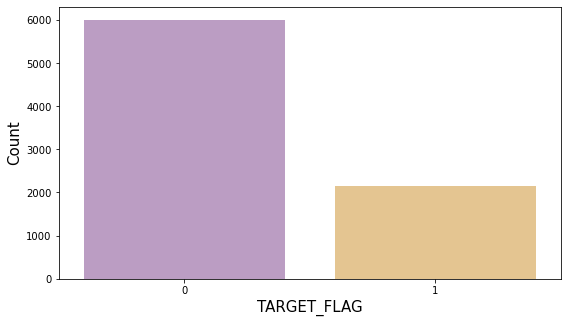

In [17]:
plt.rcParams['figure.figsize'] = (9, 5)
ax = sns.countplot(data = X_train, x =y_train, palette = 'CMRmap', alpha = 0.5)
ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('TARGET_FLAG', fontsize = 15)
plt.show()

# Correlation among the features

In [18]:
corr_table1 = X_train.corr()
corr_table1.head(5)

,INDEX,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
INDEX,1.000000,-0.000593,0.015576,0.033846,0.000052,0.026733,0.008821,0.012109,-0.023070,0.013912,-0.009214,-0.001264,0.018780,0.007883,-0.000699
TARGET_AMT,-0.000593,1.000000,0.055394,-0.041728,0.061988,-0.022085,-0.058307,-0.085602,0.027987,-0.004700,-0.046481,0.070953,0.116419,0.137866,-0.058822
KIDSDRIV,0.015576,0.055394,1.000000,-0.075179,0.464015,0.043305,-0.047134,-0.019792,0.008447,-0.021549,-0.001989,0.020403,0.037063,0.053566,-0.053993
AGE,0.033846,-0.041728,-0.075179,1.000000,-0.445441,0.136072,0.180970,0.209984,0.005269,0.165025,-0.000066,-0.029290,-0.024092,-0.071575,0.176221
HOMEKIDS,0.000052,0.061988,0.464015,-0.445441,1.000000,0.086829,-0.159330,-0.110680,-0.007246,-0.107894,0.011813,0.029911,0.029349,0.060601,-0.152146


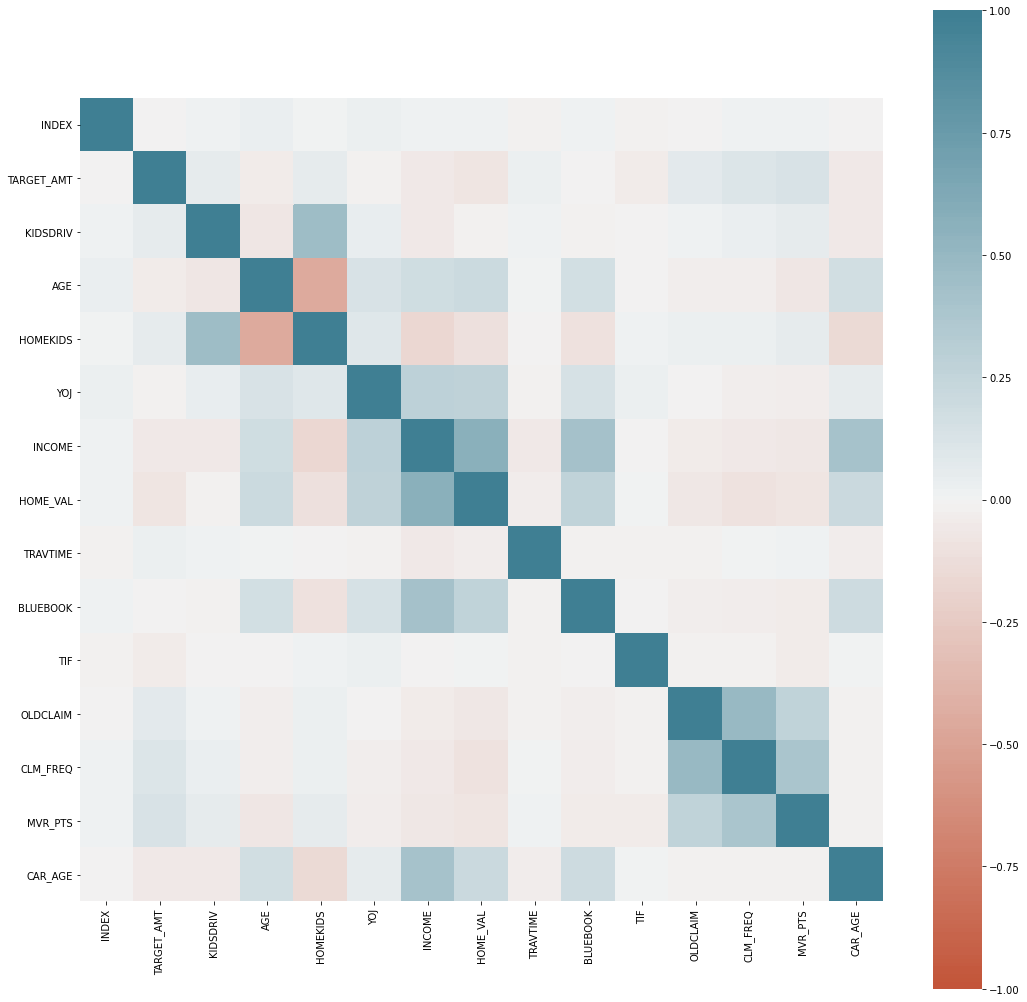

In [19]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(corr_table1, vmin=-1, vmax=1, center=0,
            square=True,cmap = sns.diverging_palette(20, 220, n=200))
plt.show()

for the feature pairs with high correlation (no metter negative or positive), perhaps we can delete some of them afterwards because some models are sensible to the features with high correlation.

In [20]:
# Correlation between label and features

In [21]:
X_temp = X_train
X_temp['TARGET_FLAG'] = y_train
X_temp = X_temp.corr()
tabel_corr2 = abs(X_temp[['TARGET_FLAG']]).sort_values(by=['TARGET_FLAG'],ascending=False)
del X_temp
gc.collect()

5808

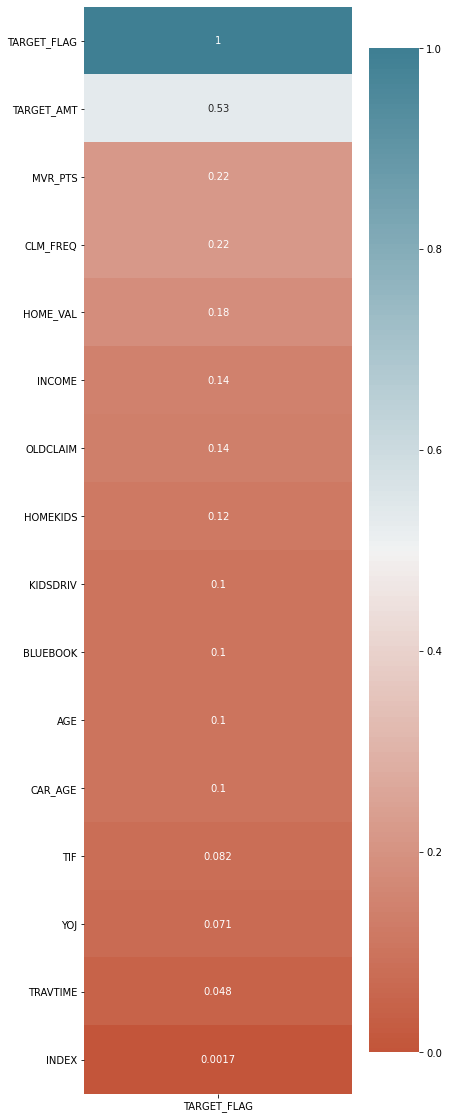

In [22]:
plt.figure(figsize=(6,20))
sns.heatmap(tabel_corr2,
            vmin=0,
            cmap = sns.diverging_palette(20, 220, n=200),
            annot=True)
plt.show()

In [23]:
# 5 features with least correlation to the label
tabel_corr2[-5:]

,TARGET_FLAG
CAR_AGE,0.100651
TIF,0.082370
YOJ,0.070512
TRAVTIME,0.048368
INDEX,0.001670


     for the features with low correlation to the label, it's possible to delete them afterwards

In [24]:
#a glance at the distribution of training data and test data

In [25]:
train_null = X_train.isnull().sum(axis=1)
train_null_distribution = pd.DataFrame(train_null.value_counts())
train_null_distribution.reset_index(inplace=True)
train_null_distribution.head(5)

,index,0
0,0,6045
1,1,1848
2,2,248
3,3,19
4,4,1


In [26]:
test_null = X_test.isnull().sum(axis=1)
test_null_distribution = pd.DataFrame(test_null.value_counts())
test_null_distribution.reset_index(inplace=True)
test_null_distribution.head(5)

,index,0
0,2,1612
1,3,465
2,4,59
3,5,4
4,6,1


<AxesSubplot:xlabel='index', ylabel='0'>

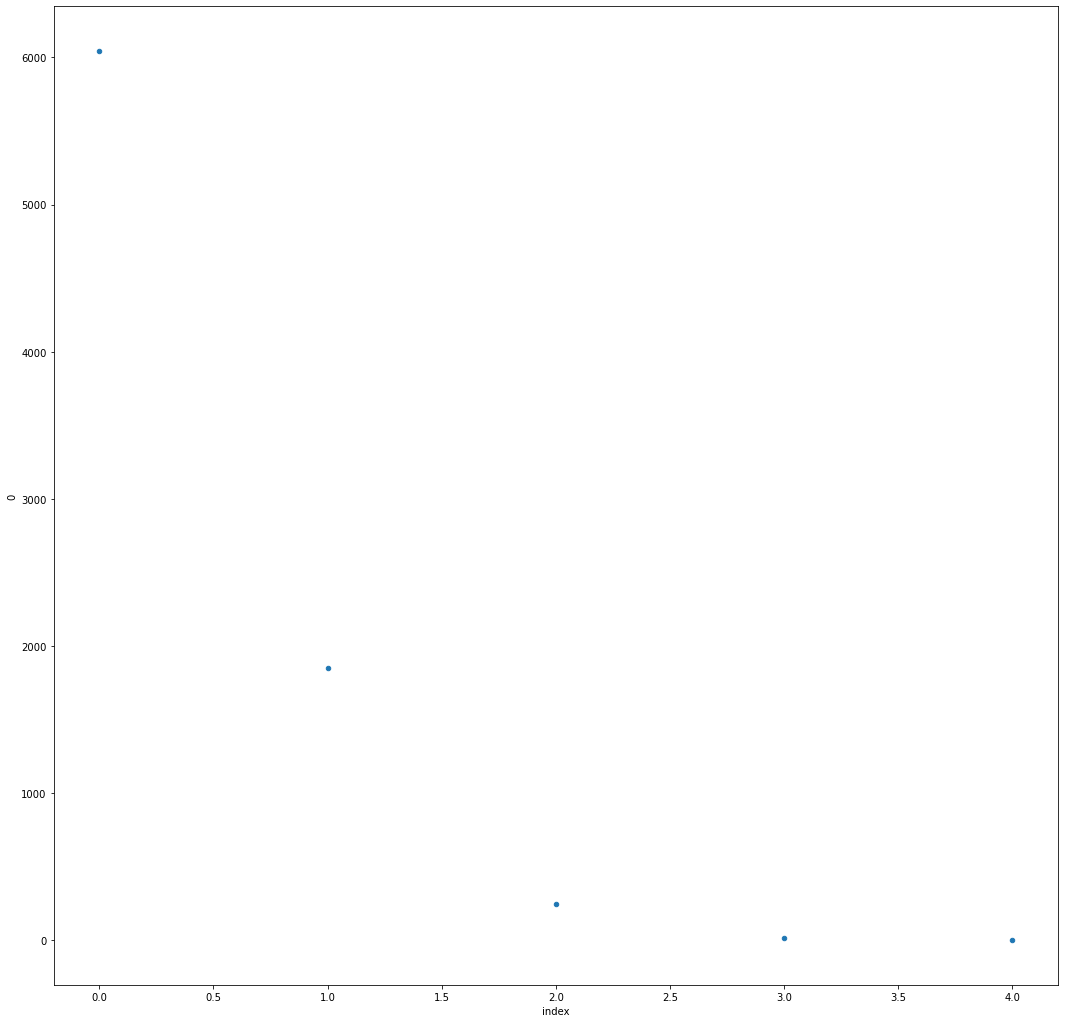

In [27]:
train_null_distribution.plot.scatter(x='index',y=0)

<AxesSubplot:xlabel='index', ylabel='0'>

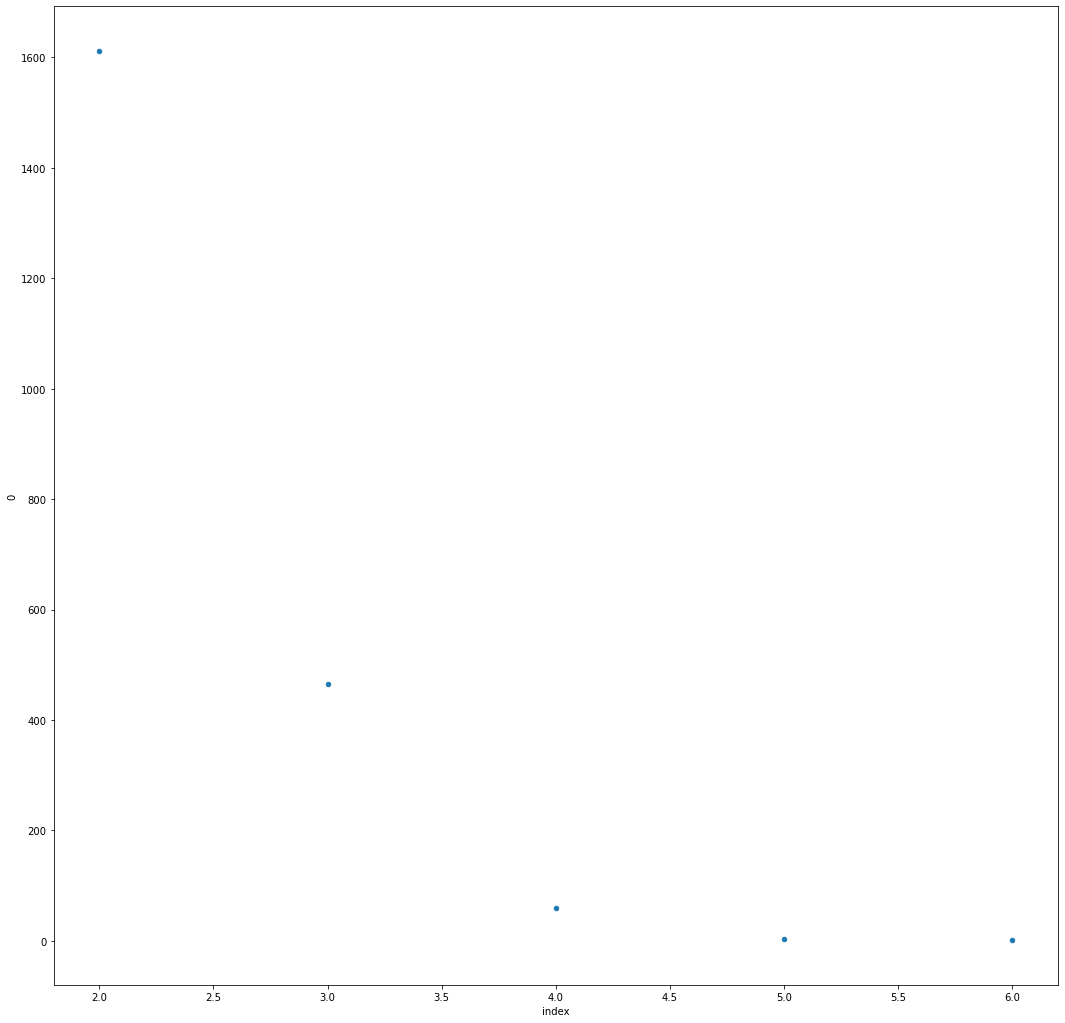

In [28]:
test_null_distribution.plot.scatter(x='index',y=0)

Plan:
a. According to EDA, we decide to preprocess our raw training and test data as following steps:
1. Delete samples with 6 and 7 missing featrues;
2. Delete directly the features that have more than 70% missing values;
3. Encode object-type data;
4. Fill missing values by mean for other features;
5. See variance again and delete top5 features with the lowest variance;
6. See correlation again to delete top5 features with the lowest correlation to the target;

# Data Preprocessing:


 delete samples with 6 and 7 missing featrues

In [29]:
(nb_sample,nb_feature) = X_train.shape
nb_delete_67 = 0
for i in range(nb_sample):
    if i < (nb_sample-nb_delete_67):
        nb_missing = X_train.iloc[i,:].isnull().sum()
        if nb_missing >= 5:
            X_train.drop(index=[i],inplace=True)
            nb_delete_67+=1
    else:
        break
print('totally delete: ',nb_delete_67, 'samples')
X_train.reset_index(drop = True,inplace = True)
X_train.head(5)

totally delete:  0 samples


,INDEX,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,TARGET_FLAG
0,1,0.0,0,60.0,0,11.0,67349.0,No,0.0,z_No,...,11,Minivan,yes,4461.0,2,No,3,18.0,Highly Urban/ Urban,0
1,2,0.0,0,43.0,0,11.0,91449.0,No,257252.0,z_No,...,1,Minivan,yes,0.0,0,No,0,1.0,Highly Urban/ Urban,0
2,4,0.0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,...,4,z_SUV,no,38690.0,2,No,3,10.0,Highly Urban/ Urban,0
3,5,0.0,0,51.0,0,14.0,NaN,No,306251.0,Yes,...,7,Minivan,yes,0.0,0,No,0,6.0,Highly Urban/ Urban,0
4,6,0.0,0,50.0,0,NaN,114986.0,No,243925.0,Yes,...,1,z_SUV,no,19217.0,2,Yes,3,17.0,Highly Urban/ Urban,0


delete directly the features that have more than 70% missing values

In [30]:
# According to EDA, we will delete the features: 
#TARGET_FLAG et TARGET_AMT
import gc
del X_test['TARGET_AMT'],X_test['TARGET_FLAG']
gc.collect()

5732

encode object-type data

In [31]:
print(X_train[X_train.columns[(X_train.dtypes == 'object')==True]].columns)


Index(['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE',
       'RED_CAR', 'REVOKED', 'URBANICITY'],
      dtype='object')


In [32]:
print(X_train['MSTATUS'].unique())
print(X_train['SEX'].unique())
print(X_train['EDUCATION'].unique())
print(X_train['CAR_USE'].unique())
print(X_train['CAR_TYPE'].unique())
print(X_train['RED_CAR'].unique())
print(X_train['REVOKED'].unique())
print(X_train['URBANICITY'].unique())
print(X_train['JOB'].unique())
print(X_train['PARENT1'].unique())

['z_No' 'Yes']
['M' 'z_F']
['PhD' 'z_High School' '<High School' 'Bachelors' 'Masters']
['Private' 'Commercial']
['Minivan' 'z_SUV' 'Sports Car' 'Van' 'Panel Truck' 'Pickup']
['yes' 'no']
['No' 'Yes']
['Highly Urban/ Urban' 'z_Highly Rural/ Rural']
['Professional' 'z_Blue Collar' 'Clerical' 'Doctor' 'Lawyer' 'Manager' nan
 'Home Maker' 'Student']
['No' 'Yes']


In [33]:
# Replace missing values with a nojob
X_train['JOB'].fillna('nojob', inplace=True)
# As we can see above, we decide to:
# onehot encoding: MSTATUS,SEX,CAR_USE, RED_CAR, REVOKED, URBANICITY ,PARENT1
X_train = X_train.join(pd.get_dummies(X_train['PARENT1']), lsuffix='_left')
del X_train['PARENT1']
X_train = X_train.join(pd.get_dummies(X_train['MSTATUS']), lsuffix='_sec')
del X_train['MSTATUS']
X_train = X_train.join(pd.get_dummies(X_train['URBANICITY']))
del X_train['URBANICITY']

X_train = X_train.join(pd.get_dummies(X_train['SEX']))
del X_train['SEX']
X_train = X_train.join(pd.get_dummies(X_train['REVOKED']), rsuffix='_right')
del X_train['REVOKED']

X_train = X_train.join(pd.get_dummies(X_train['CAR_USE']))
del X_train['CAR_USE']

X_train = X_train.join(pd.get_dummies(X_train['RED_CAR']))
del X_train['RED_CAR']

#label encoding: EDUCATION,CAR_TYPE

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(X_train['EDUCATION'])
X_train['EDUCATION'] = le.transform(X_train['EDUCATION'])
la = LabelEncoder().fit(X_train['CAR_TYPE'])
X_train['CAR_TYPE'] = la.transform(X_train['CAR_TYPE'])
laa = LabelEncoder().fit(X_train['JOB'])
X_train['JOB'] = laa.transform(X_train['JOB'])                                    
X_train.head(5)

,INDEX,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,JOB,...,Highly Urban/ Urban,z_Highly Rural/ Rural,M,z_F,No_right,Yes_right,Commercial,Private,no,yes
0,1,0.0,0,60.0,0,11.0,67349.0,0.0,3,5,...,1,0,1,0,1,0,0,1,0,1
1,2,0.0,0,43.0,0,11.0,91449.0,257252.0,4,8,...,1,0,1,0,1,0,1,0,0,1
2,4,0.0,0,35.0,1,10.0,16039.0,124191.0,4,0,...,1,0,0,1,1,0,0,1,1,0
3,5,0.0,0,51.0,0,14.0,NaN,306251.0,0,8,...,1,0,1,0,1,0,0,1,0,1
4,6,0.0,0,50.0,0,NaN,114986.0,243925.0,3,1,...,1,0,0,1,0,1,0,1,1,0


# Fill missing values by mean for other features;


In [34]:
missing_features = pd.DataFrame(X_train.dtypes,columns=['dtypes'])
missing_features = missing_features.reset_index()
missing_features['Name'] = missing_features['index']
del missing_features['index']
missing_features.reset_index(drop=True,inplace=True)
missing_features = missing_features[X_train.isnull().sum().values!=0]
missing_features

,dtypes,Name
3,float64,AGE
5,float64,YOJ
6,float64,INCOME
7,float64,HOME_VAL
17,float64,CAR_AGE


In [35]:
missing_features=missing_features[ (missing_features['dtypes'] == 'float64')]

In [36]:
# the float data, we can  fill them by mean directly
X_train.fillna(X_train.mean()[missing_features.Name],inplace=True)
print('now we have ',X_train.isnull().sum().values.sum(),' missing value')

now we have  0  missing value


In [37]:
tabel_var = X_train[X_train.columns].var().sort_values(ascending=True)
tabel_var = tabel_var.head(5)
print(tabel_var)
tabel_var.reset_index()

Yes_right              0.107533
No_right               0.107533
No                     0.114567
Yes_sec                0.114567
Highly Urban/ Urban    0.162705
dtype: float64


,index,0
0,Yes_right,0.107533
1,No_right,0.107533
2,No,0.114567
3,Yes_sec,0.114567
4,Highly Urban/ Urban,0.162705


 See correlation again to delete top5 features with the lowest correlation to the targe

In [38]:
X_temp = X_train
# X_temp['Response'] = y_train
X_temp = X_temp.corr()
tabel_corr = abs(X_temp[['TARGET_FLAG']]).sort_values(by=['TARGET_FLAG'],ascending=True)
tabel_corr = tabel_corr.head(5)
print(tabel_corr)
tabel_corr.reset_index()
for column in tabel_corr.index.tolist():
    del X_train[column]
del X_temp
gc.collect()

       TARGET_FLAG
INDEX     0.001670
no        0.006947
yes       0.006947
z_F       0.021079
M         0.021079


141

In [39]:
print(X_train.shape)
y_train = X_train['TARGET_FLAG']
del X_train['TARGET_FLAG']
gc.collect()

(8161, 28)


20

In [40]:
# Same operations on  test set

In [41]:
X_test['JOB'].fillna('nojob', inplace=True)
X_test = X_test.join(pd.get_dummies(X_test['PARENT1']), lsuffix='_left')
del X_test['PARENT1']
X_test = X_test.join(pd.get_dummies(X_test['MSTATUS']), lsuffix='_sec')
del X_test['MSTATUS']
X_test = X_test.join(pd.get_dummies(X_test['URBANICITY']))
del X_test['URBANICITY']
X_test = X_test.join(pd.get_dummies(X_test['SEX']))
del X_test['SEX']
X_test = X_test.join(pd.get_dummies(X_test['REVOKED']), rsuffix='_right')
del X_test['REVOKED']
X_test = X_test.join(pd.get_dummies(X_test['CAR_USE']))
del X_test['CAR_USE']
X_test = X_test.join(pd.get_dummies(X_test['RED_CAR']))
del X_test['RED_CAR']
le = LabelEncoder().fit(X_test['EDUCATION'])
X_test['EDUCATION'] = le.transform(X_test['EDUCATION'])
la = LabelEncoder().fit(X_test['CAR_TYPE'])
X_test['CAR_TYPE'] = la.transform(X_test['CAR_TYPE'])
laa = LabelEncoder().fit(X_test['JOB'])
X_test['JOB'] = laa.transform(X_test['JOB'])                                    
X_test.head(5)



,INDEX,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,JOB,TRAVTIME,...,Highly Urban/ Urban,z_Highly Rural/ Rural,M,z_F,No_right,Yes_right,Commercial,Private,no,yes
0,3,0,48.0,0,11.0,52881.0,0.0,1,4,26,...,1,0,1,0,1,0,0,1,0,1
1,9,1,40.0,1,11.0,50815.0,0.0,4,4,21,...,1,0,1,0,1,0,0,1,1,0
2,10,0,44.0,2,12.0,43486.0,0.0,4,8,30,...,0,1,0,1,1,0,1,0,1,0
3,18,0,35.0,2,NaN,21204.0,0.0,4,0,74,...,0,1,1,0,0,1,0,1,1,0
4,21,0,59.0,0,12.0,87460.0,0.0,4,4,45,...,1,0,1,0,1,0,0,1,0,1


In [42]:
missing_features = pd.DataFrame(X_test.dtypes,columns=['dtypes'])
missing_features = missing_features.reset_index()
missing_features['Name'] = missing_features['index']
missing_features['Name'] = missing_features['index']
del missing_features['index']
missing_features.reset_index(drop=True,inplace=True)
missing_features = missing_features[X_test.isnull().sum().values!=0]
X_test.fillna(X_test.mean()[missing_features.Name],inplace=True)

for column in tabel_var.index.tolist():
    del X_test[column]
for column in tabel_corr.index.tolist():
    del X_test[column]
print('test set shape:',X_test.shape)
gc.collect()

test set shape: (2141, 21)


20

# Data Modeling:

#### Plan:
    a. Seperate training set into training set and validation set (used in step b,c);
    b. Use some simple models like SVC, KNN to see the baseline;
    c. Use some avanced models like random forest;

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                test_size=0.15, stratify=y_train,random_state=27)
print(X_train.shape)
print(X_validation.shape)

(6936, 27)
(1225, 27)


##### SVC

In [44]:
# wait for five minutes still no result, maybe it's memory issue
from sklearn.svm import SVC
svm = SVC(C=0.5)
svm.fit(X_train,y_train)
print('validation set presicion:',svm.score(X_validation,y_validation))
print('training set precision:',svm.score(X_train,y_train))

validation set presicion: 0.7624489795918368
training set precision: 0.7593713956170703


##### KNN


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_validation)
print('validation set presicion:',accuracy_score(y_validation, y_pred))
y_pred = knn.predict(X_train)
print('training set precision:',accuracy_score(y_train, y_pred))

validation set presicion: 0.8538775510204082
training set precision: 0.8698096885813149


##### Random forest


In [46]:
# here we can also use grid search to find the best hyperparameters to tune the model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,n_estimators=2000)
clf.fit(X_train,y_train)
print('validation set presicion:',clf.score(X_validation,y_validation))
print('training set precision:',clf.score(X_train,y_train))

validation set presicion: 0.9991836734693877
training set precision: 1.0


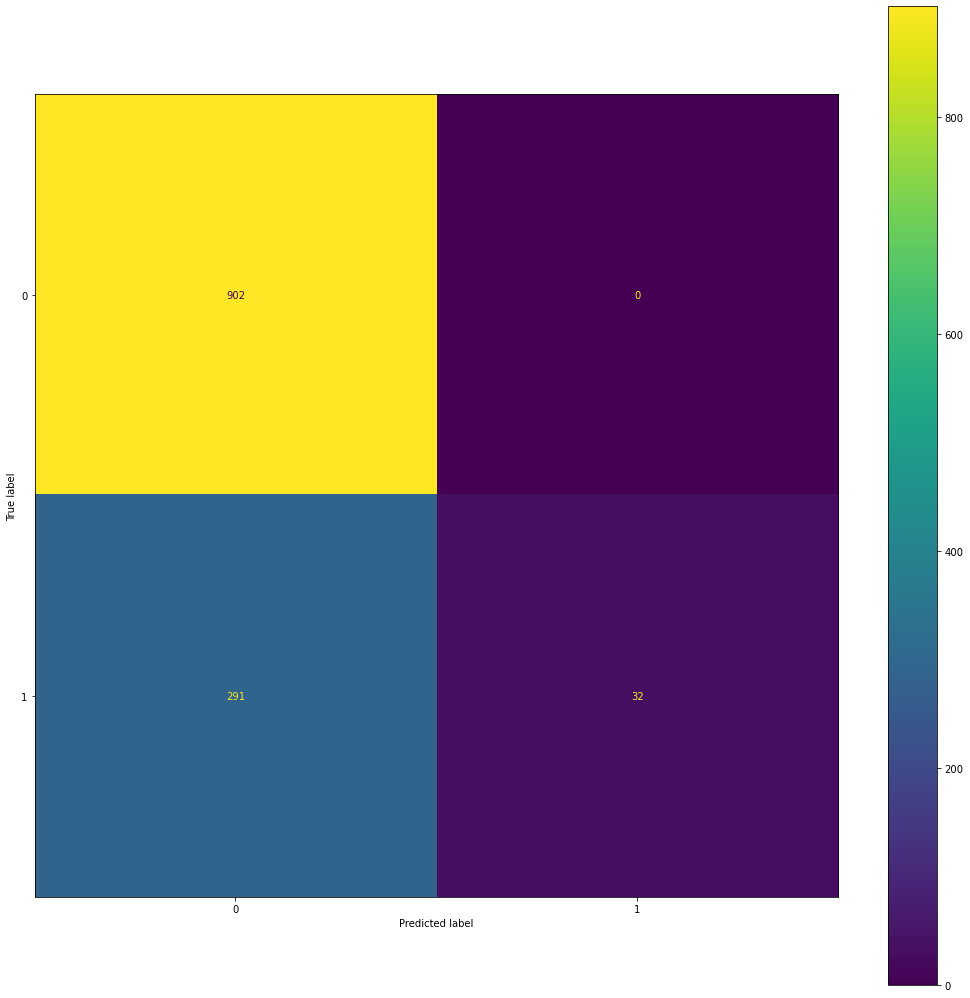

In [47]:

from sklearn.metrics import plot_confusion_matrix # To draw confusion matrix
plot_confusion_matrix(svm, X_validation, y_validation)

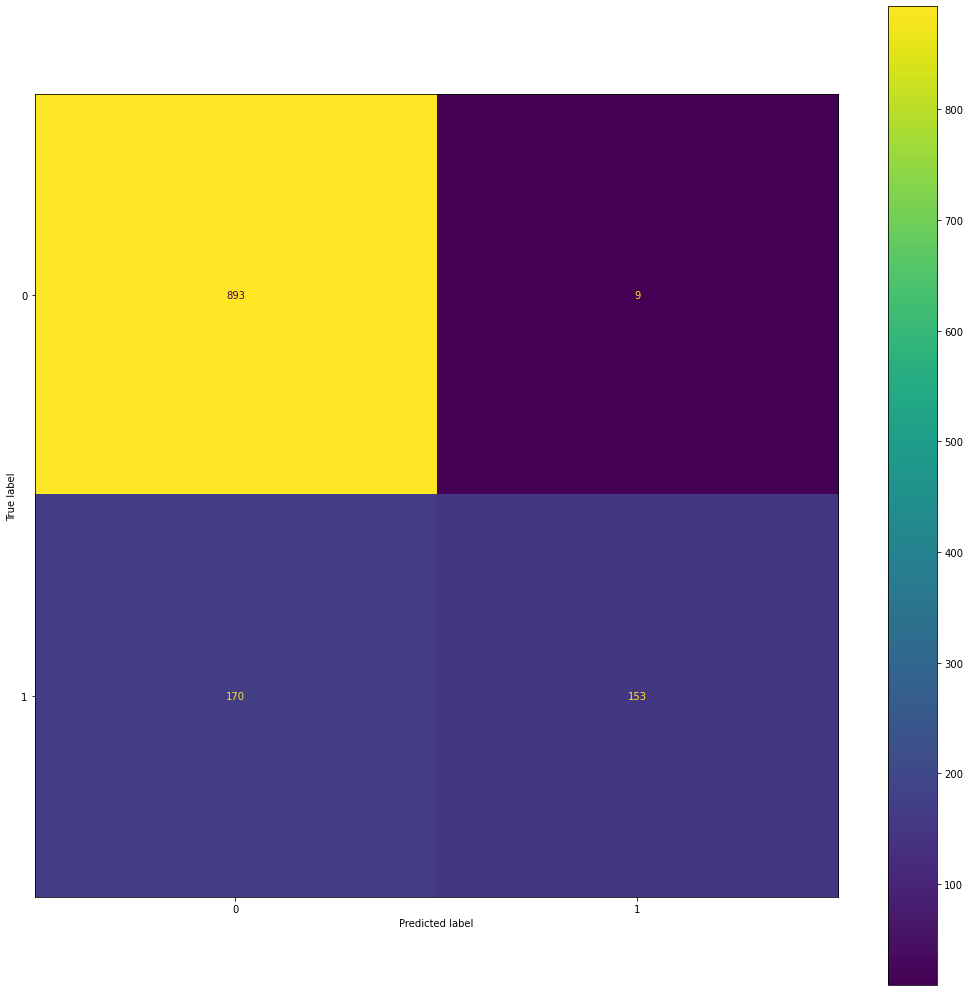

In [48]:

from sklearn.metrics import plot_confusion_matrix # To draw confusion matrix
plot_confusion_matrix(knn, X_validation, y_validation)

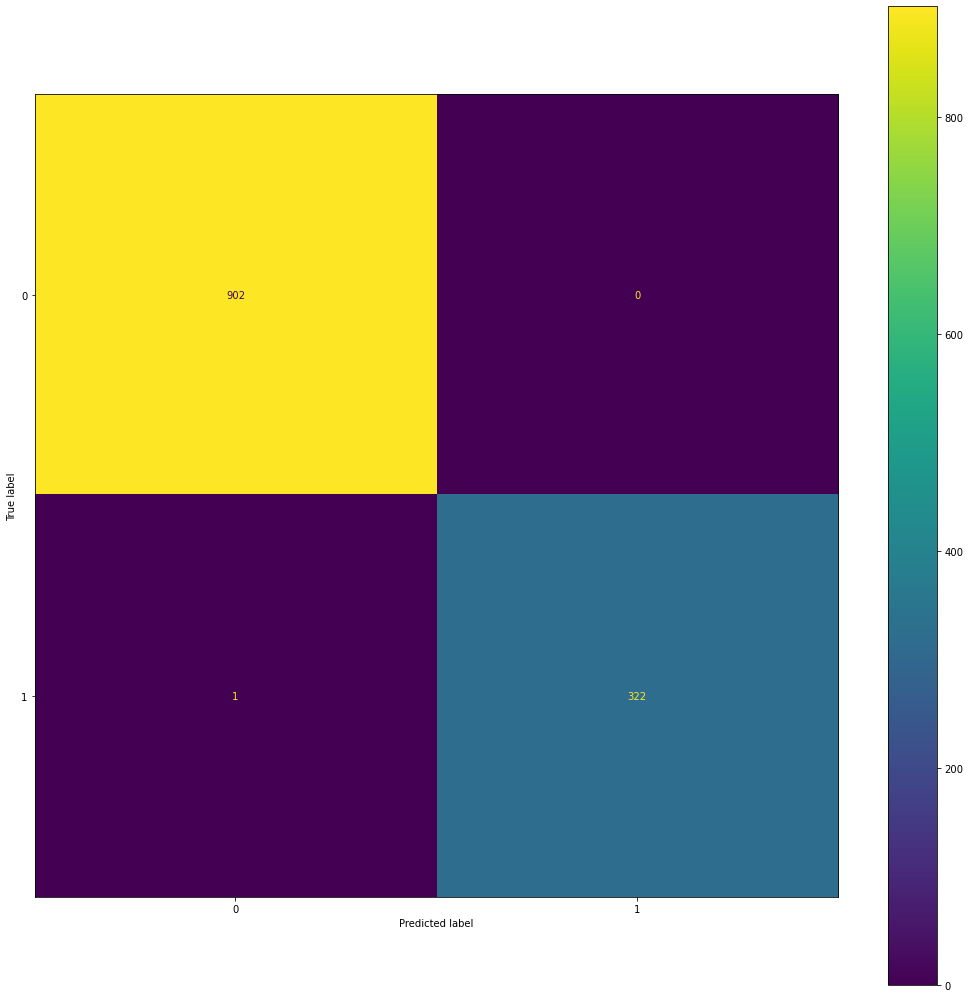

In [49]:

from sklearn.metrics import plot_confusion_matrix # To draw confusion matrix
plot_confusion_matrix(clf, X_validation, y_validation)

In [50]:
set(X_train.columns)-set(X_test.columns)

{'Highly Urban/ Urban', 'No', 'No_right', 'TARGET_AMT', 'Yes_right', 'Yes_sec'}

In [51]:
X_test["Highly Urban/ Urban"] = False
X_test["No"] = False
X_test["No_right"] = False
X_test["TARGET_AMT"] = False
X_test["Yes_right"] = False
X_test["Yes_sec"] = False

In [52]:
X_train.shape,X_test.shape

((6936, 27), (2141, 27))

In [53]:
X_test

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,JOB,TRAVTIME,BLUEBOOK,...,z_No,z_Highly Rural/ Rural,Commercial,Private,Highly Urban/ Urban,No,No_right,TARGET_AMT,Yes_right,Yes_sec
0,0,48.0,0,11.000000,52881.0,0.0,1,4,26,21970.0,...,1,0,0,1,False,False,False,False,False,False
1,1,40.0,1,11.000000,50815.0,0.0,4,4,21,18930.0,...,1,0,0,1,False,False,False,False,False,False
2,0,44.0,2,12.000000,43486.0,0.0,4,8,30,5900.0,...,1,1,1,0,False,False,False,False,False,False
3,0,35.0,2,10.379091,21204.0,0.0,4,0,74,9230.0,...,1,1,0,1,False,False,False,False,False,False
4,0,59.0,0,12.000000,87460.0,0.0,4,4,45,15420.0,...,1,0,0,1,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,0,46.0,0,0.000000,0.0,0.0,4,6,32,1500.0,...,0,1,1,0,False,False,False,False,False,False
2137,0,46.0,0,12.000000,43501.0,134977.0,4,5,60,16080.0,...,0,1,0,1,False,False,False,False,False,False
2138,0,55.0,0,10.000000,141083.0,393624.0,2,3,42,21110.0,...,0,1,0,1,False,False,False,False,False,False
2139,0,51.0,0,10.000000,128523.0,0.0,2,7,18,32960.0,...,1,0,1,0,False,False,False,False,False,False


In [54]:
# Make predictions
y_preds = knn.predict(X_test)

In [55]:
df_preds = pd.DataFrame()
df_preds["TARGET_FLA"] = y_preds



In [56]:
df_preds = pd.concat([X_test,df_preds], axis=1)

In [57]:
df_preds.head()
df_preds.to_csv("targetfla.csv",index=False)

In [58]:
df_preds.head()


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,EDUCATION,JOB,TRAVTIME,BLUEBOOK,...,z_Highly Rural/ Rural,Commercial,Private,Highly Urban/ Urban,No,No_right,TARGET_AMT,Yes_right,Yes_sec,TARGET_FLA
0,0,48.0,0,11.000000,52881.0,0.0,1,4,26,21970.0,...,0,0,1,False,False,False,False,False,False,0
1,1,40.0,1,11.000000,50815.0,0.0,4,4,21,18930.0,...,0,0,1,False,False,False,False,False,False,0
2,0,44.0,2,12.000000,43486.0,0.0,4,8,30,5900.0,...,1,1,0,False,False,False,False,False,False,0
3,0,35.0,2,10.379091,21204.0,0.0,4,0,74,9230.0,...,1,0,1,False,False,False,False,False,False,0
4,0,59.0,0,12.000000,87460.0,0.0,4,4,45,15420.0,...,0,0,1,False,False,False,False,False,False,0
